## GTA游戏AI识别车道分割线

* 1.读取与显示图像
* 2.探测边界
* 3.颜色提取
* 4.提取道路分割线


- https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
- https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/、

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle
import matplotlib.pyplot as plt
import cv2
from numpy import ones,vstack
from numpy.linalg import lstsq
from statistics import mean

%matplotlib inline

In [2]:
train_data = np.load('./data/training_data-1.npy')
df = pd.DataFrame(train_data)
print(df.head())
print(Counter(df[1].apply(str)))

                                                   0  \
0  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
1  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   
2  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
3  [[[238, 204, 171], [246, 231, 216], [63, 51, 3...   
4  [[[238, 204, 171], [246, 231, 216], [91, 90, 8...   

                             1  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 0, 1, 0, 0, 0]  
4  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 177, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 163, '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 148, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 69, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 41, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 13, '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 1})


In [3]:
def show_saved_data(idx):
    plt.figure()
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(train_data[idx][0], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgb_img)
    print(train_data[idx][1])

def get_rgb_img(img, title=None):
    plt.figure()
    
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if title:
        plt.title(title)
    imgplot = plt.imshow(rgb_img)
    return rgb_img

def show_rgb_img(img, title=None):
    get_rgb_img(img, title)

def show_raw_img(img, title=None):
    plt.figure()
    plt.axis("off")
    if title:
        plt.title(title)
    imgplot = plt.imshow(img)
    #plt.colorbar()  

def get_saved_data(idx):
    return train_data[idx][0].copy(),train_data[idx][1].copy()

[0, 0, 0, 0, 1, 0, 0, 0, 0]


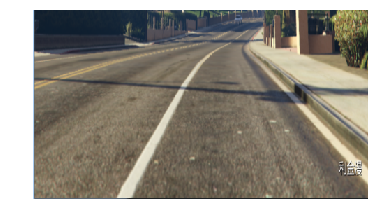

In [4]:
show_saved_data(2)

In [4]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [5]:
def draw_lines(img,lines,color=[255,255,255],width=8):
    for line in lines:
        coords = line[0]
        cv2.line(img, (coords[0], coords[1]), (coords[2], coords[3]), [255,255,255], 8)

## 2.探测边界

In [6]:

def detect_edge(rgb_image):
    gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)   
    #processed_img = cv2.Canny(rgb_image, threshold1=200, threshold2=300)
    #processed_img = cv2.Canny(gray_img, threshold1=130, threshold2=226)
    processed_img = cv2.Canny(gray_img, threshold1=48, threshold2=338)    
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )
    #vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
    #processed_img = roi(processed_img, [vertices])
    #plt.imshow(processed_img)    
    
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
    #print(lines)
    #draw_lines(processed_img,lines)    
    return processed_img, lines

In [7]:
def display_image_win(pos,img):
    cv2.imshow(pos, img)

def destroy_win():    
    while True:
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

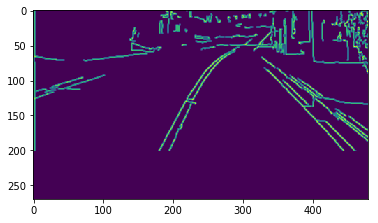

In [10]:
img, action = get_saved_data(1)
processed_img = cv2.Canny(img, threshold1=200, threshold2=300)
#processed_img = cv2.Canny(gray_img, threshold1=200, threshold2=300)
processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
processed_img = roi(processed_img, [vertices])
lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
plt.imshow(processed_img)    
#lines

In [10]:
img, action = get_saved_data(1)
display_image_win('window',img)
# use detect_edge is so easy!!!
new_screen, hlines= detect_edge(img)
#display_image_win('window2',gray_img)
display_image_win('window2',new_screen)
draw_lines(new_screen,hlines)
display_image_win('window3',new_screen)
#cv2.circle(original_image,(480,270),10,[255,0,0])
destroy_win()

In [11]:
new_screen.shape

(270, 480)

## 3.颜色提取color exctraction

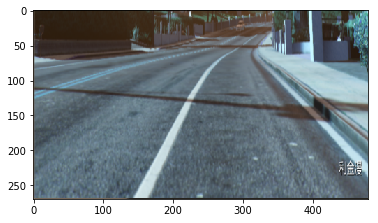

In [11]:
img, action = get_saved_data(1)
plt.imshow(img)

In [12]:
org_img = train_data[1][0]
while(1):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)

    # define range of yellow color in HSV
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45,255,255])

    lower_white = np.array([0, 0, 0])
    upper_white = np.array([100,0,255])
    
    
    
    # Threshold the HSV image to get only blue colors
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)
    
    # Bitwise-AND mask and original image
    res_yellow = cv2.bitwise_and(org_img,org_img, mask= yellow_mask)
    res1_white = cv2.bitwise_and(org_img,org_img, mask= white_mask)
    cv2.imshow('org',org_img)
    cv2.imshow('yellow_mask',yellow_mask)
    cv2.imshow('yellow',res_yellow)
    cv2.imshow('white',res1_white)
    
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [13]:
img, action = get_saved_data(10)
edge_img,line = detect_edge(img)
display_image_win('edge_img',edge_img)
draw_lines(edge_img,line)
#display_image_win('edge_img',edge_img)
#display_image_win('after_draw_edge_img',edge_img)
destroy_win()

In [15]:
# import time
# edge_img,line = detect_edge(img)
# for i,li in enumerate(line):
#     #print(i)
#     draw_lines(edge_img,[li])
#     display_image_win('win_%d'%(i),edge_img)
    
# destroy_win()

In [8]:
org_img = train_data[1][0]
#while(1):

def extract_with_yellowBGR(org_img):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)

    # define range of yellow color in HSV
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45,255,255])

    lower_white = np.array([0, 0, 0])
    upper_white = np.array([100,0,255])



    # Threshold the HSV image to get only blue colors
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)

    # Bitwise-AND mask and original image
    res_yellow = cv2.bitwise_and(org_img,org_img, mask= yellow_mask)
    res1_white = cv2.bitwise_and(org_img,org_img, mask= white_mask)
    
    return res_yellow



In [ ]:
org_img = train_data[150][0]
res_yellow=extract_with_yellowBGR(org_img)
display_image_win('yellow',res_yellow)
destroy_win()

In [ ]:
# 先用 color 把黄色的先画出来，然后找边缘
yellow_edge_img,yellow_edge_line = detect_edge(res_yellow)
display_image_win('original',res_yellow)
draw_lines(yellow_edge_img,yellow_edge_line)
display_image_win('detect_edge',yellow_edge_img)
destroy_win()

In [16]:
yellow_edge_line
lines = yellow_edge_line

In [10]:
# 找出黄线
def find_yellow_lane_BGR(org_img):
    """return a list of yellow lanes"""
    
    res_yellow=extract_with_yellowBGR(org_img)
    yellow_edge_img,yellow_edge_lines = detect_edge(res_yellow)
    return yellow_edge_lines

## 4. 探测道路分割线

In [37]:
HEIGHT = 270
def find_main_lanes(img, lines, color=[0, 255, 255], thickness=3):

    # if this fails, go with some default line
    try:
        # finds the maximum y value for a lane marker 
        # (since we cannot assume the horizon will always be at the same point.)

        ys = []  
        for i in lines:
            for ii in i:
                ys += [ii[1],ii[3]]
        #print(lines)
        min_y = min(ys)
        max_y = HEIGHT
        mid_y = 200
        new_lines = []
        line_dict = {}
        
        #yellow_lines = find_yellow_lane_BGR(img)
        # yellow_lane is the most important thing
        # 筛两次，把主要的方向筛出来，然后选择相应的线作为lane
        #yellow_lane = np.mean(yellow_edge_line,axis=0)
        #yellow_slope = (yellow_lane[3]-yellow_lane[1])/(yellow_lane[2]-yellow_lane[0])
        # use arctan to find the angle
        # case 1: if we have good yellow lane:
        #     find other lanes with 1.1 angle +_15
        #     find the nearst three lane (how to measure the distance?)
        #
        
        for idx,i in enumerate(lines):
            for xyxy in i:
                # These four lines:
                # modified from http://stackoverflow.com/questions/21565994/method-to-return-the-equation-of-a-straight-line-given-two-points
                # Used to calculate the definition of a line, given two sets of coords.
                x_coords = (xyxy[0],xyxy[2])
                y_coords = (xyxy[1],xyxy[3])
                print(y_coords)
                A = vstack([x_coords,ones(len(x_coords))]).T
                m, b = lstsq(A, y_coords)[0]
                print(m,b)
                # Caculating our new, and improved, xs
                x1 = (min_y-b) / m
                x2 = (max_y-b) / m

                line_dict[idx] = [m,b,[int(x1), min_y, int(x2), max_y]]
                new_lines.append([int(x1), min_y, int(x2), max_y])

        final_lanes = {}

        
        for idx in line_dict:
            final_lanes_copy = final_lanes.copy()
            m = line_dict[idx][0]
            b = line_dict[idx][1]
            line = line_dict[idx][2]
            
            if len(final_lanes) == 0:
                final_lanes[m] = [ [m,b,line] ]
                
            else:
                found_copy = False

                for other_ms in final_lanes_copy:
                    if not found_copy:
                        if abs(other_ms*1.2) > abs(m) > abs(other_ms*0.8):
                            if abs(final_lanes_copy[other_ms][0][1]*1.2) > abs(b) > abs(final_lanes_copy[other_ms][0][1]*0.8):
                                final_lanes[other_ms].append([m,b,line])
                                found_copy = True
                                break
                        else:
                            final_lanes[m] = [ [m,b,line] ]

        line_counter = {}

        for lanes in final_lanes:
            line_counter[lanes] = len(final_lanes[lanes])

        top_lanes = sorted(line_counter.items(), key=lambda item: item[1])[::-1][:2]
        print('78')
        #print(top_lanes)
        lane1_id = top_lanes
        #lane2_id = top_lanes[1]
        #lane3_id = top_lanes[2][0]
        #print(lane1_id)
        def average_lane(lane_data):
            x1s = []
            y1s = []
            x2s = []
            y2s = []
            for data in lane_data:
                x1s.append(data[2][0])
                y1s.append(data[2][1])
                x2s.append(data[2][2])
                y2s.append(data[2][3])
            return int(mean(x1s)), int(mean(y1s)), int(mean(x2s)), int(mean(y2s))

        l1 = average_lane(final_lanes[lane1_id])
        l2 = average_lane(final_lanes[lane2_id])
#         l3 = average_lane(final_lanes[lane3_id])
        return l1,l2
    
    except Exception as e:
        print(str(e))

In [38]:
find_main_lanes(org_img,lines,1)#cv2.circle?


(110, 90)
-0.23255813953488394 116.04651162790695
(111, 93)
-0.22784810126582203 116.92405063291137
78
unhashable type: 'list'


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [39]:
type(a)

NameError: name 'a' is not defined

In [30]:
def display_lanes(rgb_image):
    original_image = rgb_image   
    #gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
    processed_img = cv2.Canny(rgb_image, threshold1=200, threshold2=300)
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
    vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
    processed_img = roi(processed_img, [vertices])
#    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, 20, 15)
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
    
    try:
        l1,l2 = find_main_lanes(original_image,lines,1)
        cv2.line(original_image, (l1[0], l1[1]), (l1[2], l1[3]), [0,255,0], 10)
        cv2.line(original_image, (l2[0], l2[1]), (l2[2], l2[3]), [0,255,0], 10)
        cv2.line(original_image, (l3[0], l3[1]), (l3[2], l3[3]), [0,255,0], 10)
        cv2.circle(original_image,(480,270),10,[255,0,0])
#        for xyxy in lines:
            
#         print('line 1 point1 = ',l1[0],l1[1])
#         print('line 2 point1 = ',l2[0],l2[1])
#         print('line 1 point2 = ',l1[2],l1[3])
#         print('line 2 point2 = ',l2[2],l2[3])
        #cv2.circle(original_image,(l2[2],l2[3]),10,[0,255,0])
    except Exception as e:
        print(str(e))
        pass
    try:
        for coords in lines:
            coords = coords[0]
            try:
                cv2.line(processed_img, (coords[0], coords[1]), (coords[2], coords[3]), [255,0,0], 3)
            except Exception as e:
                print(str(e))
    except Exception as e:
        print(str(e))
    
    return original_image, processed_img

In [ ]:
img, action = get_saved_data(13)
original_image = img   
#gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
processed_img = cv2.Canny(img, threshold1=200, threshold2=300)
processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
processed_img = roi(processed_img, [vertices])
#    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, 20, 15)
lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
#print(lines)
display_image_win('window',img)
org_screen, new_screen= display_lanes(img)
display_image_win('window2',new_screen)
display_image_win('window3',org_screen)

destroy_win()